# 📦 Import Library

Pada tahap ini, kita mengimpor semua library yang dibutuhkan untuk proyek sistem rekomendasi. Library-library ini mencakup pandas dan numpy untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, re untuk operasi teks dasar (regular expressions), serta TensorFlow dan Scikit-Learn untuk membangun model machine learning dan melakukan pra-pemrosesan data.

In [15]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 📥 Download dan Load Dataset

Pada bagian ini, kita akan mengunduh dataset yang dibutuhkan dari Kaggle. Proses ini melibatkan beberapa langkah:

1. Mengunggah Kunci API Kaggle: File kaggle.json diunggah untuk otentikasi dengan Kaggle. Ini diperlukan agar kita bisa menggunakan API Kaggle untuk mengunduh dataset.

2. Konfigurasi Direktori Kaggle: Membuat direktori .kaggle di home directory pengguna, memindahkan file kaggle.json ke dalamnya, dan mengatur izin akses file tersebut agar aman dan dapat dibaca oleh Kaggle CLI.

3. Verifikasi Koneksi: Mengecek koneksi ke Kaggle API dengan mencari dataset yang relevan menggunakan perintah kaggle datasets list. Output dari perintah ini akan menampilkan daftar dataset yang cocok dengan kata kunci "movie recommendation system", yang menandakan API berhasil terhubung dan kita bisa melanjutkan.

4. Mengunduh Dataset: Mengunduh dataset "Movie Recommendation System" dari pengguna parasharmanas di Kaggle. Dataset ini berisi informasi film dan rating pengguna.

5. Mengekstrak Dataset: Mengekstrak file ZIP yang telah diunduh ke dalam direktori movie_dataset. Ini akan membuat file CSV (movies.csv dan ratings.csv) tersedia untuk dibaca.

6. Memuat Dataset ke Pandas: Membaca file movies.csv dan ratings.csv ke dalam DataFrame Pandas. Setelah memuat, kita mencetak informasi mengenai jumlah data film unik, jumlah total data penilaian, dan jumlah pengguna unik yang memberikan penilaian. Output ini memberikan gambaran awal mengenai skala dataset yang akan kita gunakan: berapa banyak entitas film yang ada, seberapa banyak interaksi rating yang tercatat, dan seberapa besar basis pengguna dalam dataset ini.

In [16]:
from google.colab import files
files.upload() # Akan muncul prompt untuk memilih file kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"naufalraflyw","key":"49675ffc71c83d7af022b7b740b0c07b"}'}

In [17]:
# Buat folder .kaggle dan pindahkan file JSON API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Cek koneksi berhasil
!kaggle datasets list -s "movie recommendation system"

# Download dataset Movie Recommendation System
!kaggle datasets download -d parasharmanas/movie-recommendation-system

# Ekstrak file ZIP
!unzip movie-recommendation-system.zip -d movie_dataset

ref                                                              title                                                 size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
parasharmanas/movie-recommendation-system                        Movie Recommendation System                      172958815  2023-06-08 06:56:05.297000          12876        102  1.0              
dev0914sharma/dataset                                            Movie Recommendation System                         894591  2021-05-09 08:21:06.400000           4304         37  0.7058824        
bandikarthik/movie-recommendation-system                         Movie Recommendation System                      162741732  2020-07-06 06:18:28.703000           1404          8  0.8235294        
CooperUnion/ani

In [18]:
# Load dataset
movies = pd.read_csv('movie_dataset/movies.csv')
ratings = pd.read_csv('movie_dataset/ratings.csv')

In [19]:
print('Jumlah data film: ', len(movies.movieId.unique()))
print('Jumlah data penilaian film: ', len(ratings))
print('Jumlah user yang memberikan penilaian: ', len(ratings.userId.unique()))

Jumlah data film:  62423
Jumlah data penilaian film:  25000095
Jumlah user yang memberikan penilaian:  162541


# 🔍 Eksplorasi Awal Dataset


## 🎬 Informasi Dataset `movies.csv`

Selanjutnya, kita melakukan eksplorasi awal pada dataset `movies.csv` untuk memahami struktur dan isinya.

Perintah `movies.info()` akan menampilkan ringkasan DataFrame `movies`, termasuk tipe data setiap kolom dan jumlah nilai non-null. Dari output ini, kita bisa melihat apakah ada kolom yang memiliki data kosong (missing values) dan memastikan tipe data sesuai dengan ekspektasi (misalnya, `movieId` sebagai integer, `title` dan `genres` sebagai string/object).

Kemudian, kita mencetak jumlah data unik untuk `movieId` dan jumlah judul unik. Ini membantu memverifikasi keunikan ID film dan mengetahui variasi judul film. Beberapa contoh judul juga ditampilkan untuk mendapatkan gambaran tentang formatnya.

Terakhir, kita menampilkan jumlah genre unik dan beberapa contohnya. Karena satu film bisa memiliki beberapa genre yang digabungkan dalam satu string (misalnya, "Adventure|Animation|Children|Comedy|Fantasy"), jumlah genre unik di sini merujuk pada kombinasi genre yang unik. Mengetahui variasi genre penting untuk analisis lebih lanjut, seperti visualisasi genre populer.

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [21]:
print('Banyak data film (berdasarkan movieId unik):', len(movies['movieId'].unique()))

print('Total judul unik:', movies['title'].nunique())
print('Beberapa contoh judul film:', movies['title'].unique()[:10])

print('Total genre unik (kombinasi):' , movies['genres'].nunique())
print('Beberapa contoh kombinasi genre:', movies['genres'].unique()[:10])

Banyak data film (berdasarkan movieId unik): 62423
Total judul unik: 62325
Beberapa contoh judul film: ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)'
 'Waiting to Exhale (1995)' 'Father of the Bride Part II (1995)'
 'Heat (1995)' 'Sabrina (1995)' 'Tom and Huck (1995)'
 'Sudden Death (1995)' 'GoldenEye (1995)']
Total genre unik (kombinasi): 1639
Beberapa contoh kombinasi genre: ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror']


## 📊 Visualisasi Top 20 Genre Terpopuler

Untuk mendapatkan pemahaman yang lebih baik tentang distribusi genre film, kita membuat visualisasi 20 genre (atau kombinasi genre) terpopuler.

Pertama, kita menghitung frekuensi kemunculan setiap string genre menggunakan `value_counts()` pada kolom `genres` dan mengambil 20 teratas (`head(20)`). Hasilnya disimpan dalam DataFrame `top_genres` dengan kolom 'Genre' dan 'Jumlah Film'.

Kemudian, data ini divisualisasikan menggunakan `seaborn.barplot`. Grafik batang horizontal akan ditampilkan, di mana sumbu Y adalah nama genre dan sumbu X adalah jumlah film untuk genre tersebut.

**Insight**: Grafik yang dihasilkan akan menunjukkan genre mana yang paling banyak muncul dalam dataset. Misalnya, kita mungkin akan melihat bahwa genre seperti 'Drama' atau 'Comedy' (atau kombinasi yang menyertakannya) mendominasi. Insight ini penting untuk memahami fokus utama dari koleksi film yang kita miliki dan dapat mempengaruhi bagaimana model rekomendasi berbasis konten akan berperilaku, karena film dengan genre populer akan memiliki lebih banyak "tetangga" potensial.

Pada grafik ini juga terdapat genre yang tidak diketahui, yaitu "(no genres listed)", yang sebaiknya dihapus karena tidak memberikan informasi relevan untuk analisis atau pembuatan sistem rekomendasi. Kehadiran genre kosong ini dapat mengganggu perhitungan distribusi genre dan memperkenalkan noise dalam model. Oleh karena itu, langkah pembersihan data dengan menghapus baris yang memiliki genre tidak diketahui perlu dilakukan sebelum analisis lebih lanjut atau proses training model.

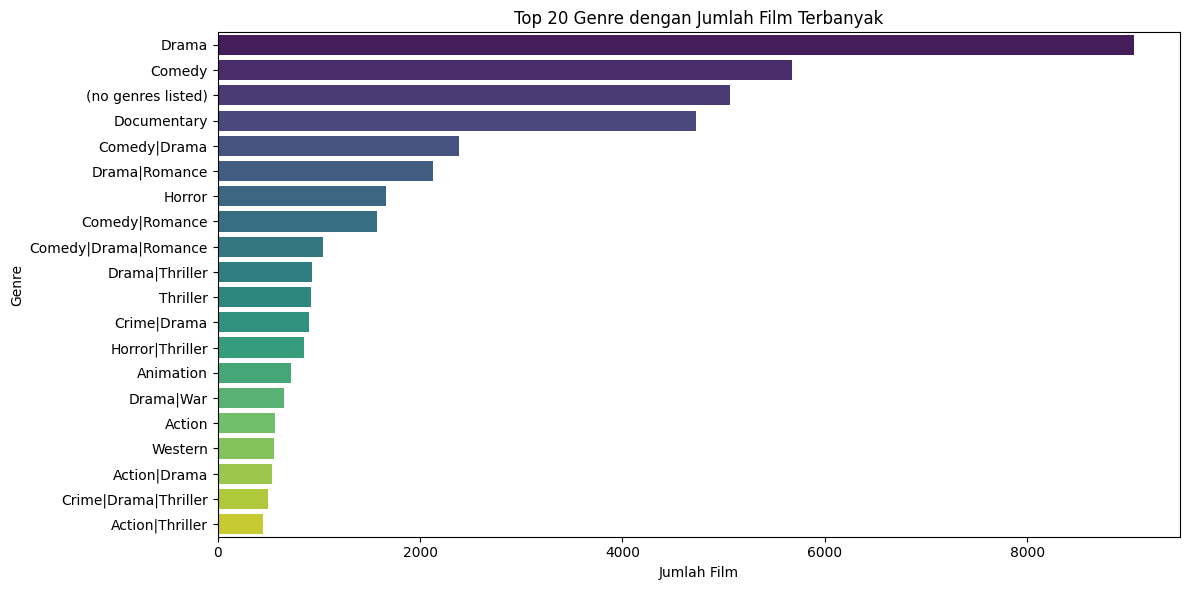

In [22]:
# Hitung jumlah film per genre
top_genres = movies['genres'].value_counts().head(20).reset_index()
top_genres.columns = ['Genre', 'Jumlah Film']

# Plot distribusi top 20 genre
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='Jumlah Film', y='Genre', hue='Genre', palette='viridis', legend=False)
plt.title('Top 20 Genre dengan Jumlah Film Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [23]:
# Buang baris dengan genre tidak diketahui
movies = movies[movies['genres'] != '(no genres listed)']

## ⭐ Informasi Dataset `ratings.csv`

Sekarang kita beralih ke dataset `ratings.csv` untuk memahami data penilaian pengguna.

`ratings.info()` memberikan ringkasan DataFrame `ratings`. Ini akan menunjukkan tipe data dan nilai non-null untuk `userId`, `movieId`, `rating`, dan `timestamp`. Dari sini, kita bisa melihat apakah ada data yang hilang dan apakah tipe data sudah sesuai.

Kolom `timestamp` dianggap tidak relevan untuk model rekomendasi yang akan kita bangun pada proyek ini, sehingga dihapus menggunakan `ratings.drop(columns=['timestamp'])`. Menghapus kolom yang tidak perlu dapat menyederhanakan dataset dan mengurangi penggunaan memori.

Selanjutnya, kita mencetak jumlah pengguna unik, film unik yang dirating, dan total data rating. Ini memberikan konfirmasi mengenai skala data interaksi setelah potensi modifikasi (seperti penghapusan kolom).

`ratings.describe()` akan menampilkan statistik deskriptif untuk kolom numerik, terutama kolom `rating`. `pd.set_option('display.float_format', '{:.2f}'.format)` digunakan agar angka float ditampilkan dengan dua desimal untuk kemudahan pembacaan.

**Insight**: Output dari `describe()` pada kolom `rating` sangat penting. Ini akan menunjukkan rentang nilai rating (misalnya, dari 0.5 hingga 5.0), rata-rata rating (misalnya, sekitar 3.5), standar deviasi, serta nilai minimum, maksimum, dan kuartil (25%, 50% atau median, 75%). Insight ini membantu memahami bagaimana pengguna cenderung memberikan penilaian dan distribusi umum dari rating film. Misalnya, jika rata-rata rating tinggi, itu menunjukkan pengguna cenderung memberikan penilaian positif.

In [24]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [25]:
# Menghapus kolom timestamp karena tidak akan digunakan
ratings = ratings.drop(columns=['timestamp'])

In [26]:
print('Banyak data user unik:', len(ratings['userId'].unique()))
print('Banyak data film unik yang dirating:', len(ratings['movieId'].unique()))
print('Banyak total data rating:', len(ratings))

Banyak data user unik: 162541
Banyak data film unik yang dirating: 59047
Banyak total data rating: 25000095


In [27]:
# Mengatur format tampilan float menjadi 2 angka di belakang koma
pd.set_option('display.float_format', '{:.2f}'.format)
print(ratings.describe())

           userId     movieId      rating
count 25000095.00 25000095.00 25000095.00
mean     81189.28    21387.98        3.53
std      46791.72    39198.86        1.06
min          1.00        1.00        0.50
25%      40510.00     1196.00        3.00
50%      80914.00     2947.00        3.50
75%     121557.00     8623.00        4.00
max     162541.00   209171.00        5.00


# 🧹 Menggabungkan dan Membersihkan Dataset

Tahap ini dimulai dengan membuat DataFrame baru `all_movies_rate` sebagai salinan dari `ratings`. Meskipun dalam kode ini `all_movies_rate` langsung digunakan, praktik menyalin data asli sebelum modifikasi adalah langkah yang baik untuk menjaga integritas data asli. `all_movies_rate.head()` akan menampilkan 5 baris pertama dari data rating, memberikan kita contoh bagaimana data rating tersimpan sebelum digabungkan.

In [28]:
# Membuat all_movies_rate dengan mengambil data dari ratings
# Di sini, all_movies_rate hanyalah salinan dari ratings, siap untuk digabungkan.
all_movies_rate = ratings
all_movies_rate.head()

,userId,movieId,rating
0,1,296,5.00
1,1,306,3.50
2,1,307,5.00
3,1,665,5.00
4,1,899,3.50


## 🔗 Merge `movies` dan `ratings`

Selanjutnya, kita menggabungkan DataFrame `movies` dengan `all_movies_rate` (yang berisi data ratings) berdasarkan kolom `movieId`. Penggabungan ini dilakukan dengan `pd.merge()` menggunakan `how='left'`. Ini berarti semua film dari dataset `movies` akan tetap ada; jika sebuah film memiliki data rating, informasi rating tersebut akan ditambahkan. Jika tidak ada rating, kolom-kolom dari `ratings` akan berisi `NaN` untuk film tersebut. `all_movies.head()` akan menampilkan 5 baris pertama dari DataFrame hasil gabungan (`all_movies`).

**Insight**: Kita akan melihat kolom-kolom dari kedua dataset (seperti `title`, `genres` dari `movies`, dan `userId`, `rating` dari ratings) kini berada dalam satu DataFrame. Ini memudahkan analisis yang melibatkan atribut film dan ratingnya secara bersamaan. Setiap baris kini merepresentasikan sebuah rating yang diberikan oleh seorang pengguna untuk sebuah film, lengkap dengan detail film tersebut.

In [29]:
# Menggabungkan dataset movies dengan all_movies_rate (ratings) berdasarkan movieId
# how='left' memastikan semua film dari 'movies' tetap ada,
# dan data rating ditambahkan jika ada padanannya.
all_movies = pd.merge(movies, all_movies_rate, on='movieId', how='left')
all_movies.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.00,3.50
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.00,4.00
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.00,3.00
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.00,4.00
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.00,4.00


## 🚫 Menghapus Missing Value

Setelah penggabungan, penting untuk memeriksa dan menangani nilai yang hilang (missing values).

`all_movies.isnull().sum()` akan menampilkan jumlah missing values untuk setiap kolom dalam DataFrame `all_movies`.

**Insight Awal**: Hasil dari `left merge` mungkin menghasilkan nilai `NaN` pada kolom-kolom yang berasal dari `ratings` (seperti `userId`, `rating`) untuk film-film yang ada di `movies.csv` tetapi tidak memiliki satupun rating di `ratings.csv`.

Kemudian, `all_movies_clean = all_movies.dropna()` digunakan untuk menghapus semua baris yang mengandung setidaknya satu nilai `NaN`. Ini adalah strategi sederhana untuk membersihkan data, yang berarti kita hanya akan bekerja dengan film yang memiliki setidaknya satu rating dan semua informasi terkait lengkap `all_movies_clean` akan ditampilkan untuk melihat hasilnya.

Terakhir, `all_movies_clean.isnull().sum()` dipanggil lagi untuk memverifikasi bahwa semua missing values telah berhasil dihapus dari DataFrame `all_movies_clean`.

Insight Akhir: Idealnya, output dari `all_movies_clean.isnull().sum()` akan menunjukkan angka 0 untuk semua kolom, menandakan bahwa DataFrame tersebut sudah bersih dari missing values dan siap untuk analisis lebih lanjut. Jumlah baris pada `all_movies_clean` kemungkinan akan lebih sedikit dari `all_movies` jika ada film tanpa rating atau data rating yang tidak lengkap.

In [30]:
# Mengecek missing value pada dataframe all_movies hasil merge
all_movies.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,2882
rating,2882


In [31]:
# Membersihkan missing value dengan fungsi dropna()
# Ini akan menghapus baris-baris yang memiliki setidaknya satu nilai NaN.
# Artinya, film yang tidak memiliki rating, atau rating yang tidak memiliki userId, akan terhapus.
all_movies_clean = all_movies.dropna()
all_movies_clean

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.00,3.50
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.00,4.00
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.00,3.00
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.00,4.00
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.00,4.00
...,...,...,...,...,...
24976345,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,134916.00,5.00
24976346,209157,We (2018),Drama,119571.00,1.50
24976347,209159,Window of the Soul (2001),Documentary,115835.00,3.00
24976348,209163,Bad Poems (2018),Comedy|Drama,6964.00,4.50


In [32]:
# Mengecek kembali missing value pada dataframe all_movies_clean setelah dibersihkan
all_movies_clean.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,0
rating,0


Pada tahap di bawah ini, kita membuat DataFrame `preparation` yang bertujuan untuk mendapatkan daftar film unik beserta metadata-nya (judul dan genre). `preparation = all_movies.drop_duplicates('movieId')` digunakan untuk menghapus baris duplikat berdasarkan `movieId` dari DataFrame `all_movies` (bukan `all_movies_clean`). Ini berarti kita mengambil informasi film dari hasil merge, dan jika sebuah film muncul berkali-kali karena banyak rating, kita hanya mengambil satu entri unik film tersebut. `preparation` kemudian ditampilkan.

**Insight**: DataFrame `preparation` akan berisi satu baris untuk setiap `movieId` unik, bersama dengan `title` dan `genres`-nya. Kolom `userId` dan `rating` di sini mungkin berasal dari rating pertama yang terkait dengan `movieId` tersebut dalam `all_movies`, tetapi tujuan utama di sini adalah untuk mendapatkan daftar film unik untuk keperluan content-based filtering.

In [33]:
# Mengambil data film unik dari all_movies.
# Ini berguna untuk membuat daftar film yang akan digunakan pada content-based filtering.
# Jika sebuah film memiliki banyak rating, drop_duplicates('movieId') akan mengambil satu entri saja.
preparation = all_movies.drop_duplicates('movieId')
preparation

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.00,3.50
57309,2,Jumanji (1995),Adventure|Children|Fantasy,9.00,5.00
81537,3,Grumpier Old Men (1995),Comedy|Romance,8.00,4.00
93341,4,Waiting to Exhale (1995),Comedy|Drama|Romance,141.00,3.00
95864,5,Father of the Bride Part II (1995),Comedy,18.00,4.00
...,...,...,...,...,...
24976345,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,134916.00,5.00
24976346,209157,We (2018),Drama,119571.00,1.50
24976347,209159,Window of the Soul (2001),Documentary,115835.00,3.00
24976348,209163,Bad Poems (2018),Comedy|Drama,6964.00,4.50


## 🎯 Sampling Data Film

Untuk mempercepat proses komputasi, terutama pada tahap pengembangan model content-based filtering, kita akan melakukan sampling data film dari `preparation`.

`preparation = preparation.sample(frac=1, random_state=42).reset_index(drop=True)` pertama-tama mengacak seluruh baris DataFrame `preparation` secara acak (`frac=1` berarti mengambil semua baris untuk diacak). `random_state=42` digunakan untuk memastikan hasil pengacakan konsisten jika kode dijalankan ulang. `reset_index(drop=True)` mengatur ulang index setelah pengacakan.

Kemudian, `preparation = preparation[:10000]` mengambil 10.000 data film pertama dari hasil acak tersebut. Jika jumlah film unik kurang dari 10.000, maka semua film unik akan diambil.

Selanjutnya, kolom `movieId`, `title`, dan `genres` dari DataFrame `preparation` yang telah disampling diekstrak menjadi list Python.
`print(len(movieId))`, `print(len(title))`, dan `print(len(genres))` akan menampilkan jumlah item dalam setiap list.

**Insight**: Jumlah yang ditampilkan (misalnya 10.000) mengkonfirmasi bahwa proses sampling dan ekstraksi ke list berhasil. Ini berarti kita akan bekerja dengan subset data film yang lebih kecil namun representatif (karena diacak) untuk tahap selanjutnya.

In [34]:
# Mengacak seluruh data film unik dan mereset indeksnya
preparation = preparation.sample(frac=1, random_state=42).reset_index(drop=True)

# Mengambil 10.000 sampel film pertama (atau kurang jika total film < 10000)
preparation = preparation[:10000]

In [35]:
# Mengonversi data series movieId dari DataFrame 'preparation' yang sudah disampling menjadi dalam bentuk list
movieId = preparation['movieId'].tolist()

# Mengonversi data series title menjadi dalam bentuk list
title = preparation['title'].tolist()

# Mengonversi data series genres menjadi dalam bentuk list
genres = preparation['genres'].tolist()

print(len(movieId))
print(len(title))
print(len(genres))

10000
10000
10000


Data list yang telah diekstrak kemudian digunakan untuk membuat DataFrame baru bernama `movies_new` dengan kolom `id` (dari `movieId`), `title`, dan `genre` (dari `genres`). DataFrame `movies_new` ini ditampilkan.

Kemudian, DataFrame ini disalin ke variabel `data` untuk kemudahan penggunaan nama variabel. `data.sample(5)` menampilkan 5 baris acak dari DataFrame `data`.

**Insight**: `movies_new` (dan `data`) adalah DataFrame yang lebih ramping dan terstruktur yang khusus berisi informasi film yang akan digunakan untuk membangun sistem rekomendasi berbasis konten. Tampilan sampel acak memastikan bahwa DataFrame telah terbentuk dengan benar dan berisi data yang diharapkan (ID film, judul, dan genre).

In [36]:
# Membuat dictionary untuk data "movieId", "title", "genres"
movies_new = pd.DataFrame({
    'id' : movieId,
    'title' : title,
    'genre' : genres
})

movies_new

,id,title,genre
0,130344,Coast of Death (2013),Children|Documentary|Drama
1,115463,"Dance Party, USA (2006)",Drama
2,203849,Ishq (2019),Drama|Romance|Thriller
3,122096,Tell Them Willie Boy is Here (1969),Drama|Western
4,120857,Bloodsuckers (2005),Action|Horror|Sci-Fi
...,...,...,...
9995,164336,Bone Daddy (1998),Horror
9996,1186,"Sex, Lies, and Videotape (1989)",Drama
9997,178883,Ghosts of Rome (1961),Comedy|Fantasy
9998,177163,Cord (2015),Horror|Sci-Fi


In [37]:
# Mengassign movies_new ke variabel 'data' untuk kemudahan penggunaan
data = movies_new
# Menampilkan 5 sampel acak dari DataFrame 'data'
data.sample(5)

,id,title,genre
6821,169610,Marc Maron: More Later (2015),Comedy
9251,166484,638 Ways to Kill Castro (2006),Documentary
257,77680,"Dalton, Les (2004)",Comedy|Western
2199,154392,Offset (2006),Drama
4120,193811,Burning Shadow (2018),Thriller


# 🧠 Content-Based Filtering

Sekarang kita akan membangun sistem rekomendasi menggunakan metode Content-Based Filtering. Pendekatan ini merekomendasikan item (film) berdasarkan kemiripan fitur antar item itu sendiri. Dalam kasus ini, kita akan menggunakan fitur teks dari film (judul dan genre) untuk menentukan kemiripan.

## 🧬 Menggabungkan Judul dan Genre

Langkah pertama dalam Content-Based Filtering adalah membuat representasi konten tunggal dari setiap film. Kita membuat kolom baru bernama `combined` yang merupakan gabungan dari konten kolom `title` dan kolom `genre`, dipisahkan oleh spasi.

Fungsi `fillna('')` digunakan untuk mengisi nilai yang hilang (jika ada pada kolom `title` atau `genre` sebelum penggabungan) dengan string kosong. Ini memastikan bahwa setiap film memiliki representasi teks yang dapat diproses lebih lanjut tanpa error karena nilai `NaN`.

**Insight**: Kolom `combined` ini akan menjadi dasar teks yang akan diubah menjadi vektor fitur numerik. Menggabungkan judul dan genre memungkinkan model untuk menangkap sinyal kemiripan dari kedua aspek tersebut.

In [38]:
# Membuat kolom 'combined' dengan menggabungkan isi kolom 'title' dan 'genre'.
# fillna('') digunakan untuk mengatasi kemungkinan adanya nilai NaN pada title atau genre,
# menggantinya dengan string kosong agar proses konkatenasi string berjalan lancar.
data['combined'] = (
    data['title'].fillna('') + ' ' +
    data['genre'].fillna('')
)
# Menampilkan DataFrame 'data' dengan kolom baru 'combined' (beberapa baris awal)
data.head()

,id,title,genre,combined
0,130344,Coast of Death (2013),Children|Documentary|Drama,Coast of Death (2013) Children|Documentary|Drama
1,115463,"Dance Party, USA (2006)",Drama,"Dance Party, USA (2006) Drama"
2,203849,Ishq (2019),Drama|Romance|Thriller,Ishq (2019) Drama|Romance|Thriller
3,122096,Tell Them Willie Boy is Here (1969),Drama|Western,Tell Them Willie Boy is Here (1969) Drama|Western
4,120857,Bloodsuckers (2005),Action|Horror|Sci-Fi,Bloodsuckers (2005) Action|Horror|Sci-Fi


## 🧼 Preprocessing Teks

Sebelum teks dapat diubah menjadi vektor numerik, perlu dilakukan pra-pemrosesan untuk membersihkan dan menstandarisasi teks.

Fungsi `clean_text` didefinisikan untuk melakukan tugas ini:

1. `isinstance(text, str)`: Memeriksa apakah input adalah string. Jika tidak, string kosong dikembalikan. Ini untuk menghindari error jika ada data non-string.

2. `re.sub(r'[^\w\s]', '', text)`: Menghapus semua karakter yang bukan alfanumerik (huruf dan angka) atau spasi (whitespace). Ini menghilangkan tanda baca dan simbol lainnya.

3. `text.lower()`: Mengubah semua teks menjadi huruf kecil. Ini penting agar kata yang sama namun berbeda kapitalisasi (misal, "Movie" dan "movie") dianggap sama. Fungsi `clean_text` ini kemudian diterapkan pada setiap baris di kolom `combined` menggunakan `data['combined'].apply(clean_text)`, dan hasilnya disimpan dalam kolom baru `cleaned`.

Selain itu, dilakukan juga proses pembersihan dan penekanan informasi pada kolom `genre`, yang kemudian digabungkan dengan `title`:

4. `data['genre_cleaned'] = data['genre'].str.lower().str.replace('|', ' ')`: Genre yang semula dipisahkan oleh simbol | diubah menjadi spasi agar TF-IDF dapat mengenalinya sebagai kata individual. Genre juga diubah menjadi huruf kecil untuk konsistensi.

5. `data['cleaned'] = data['title'].str.lower() + ' ' + (data['genre_cleaned'] + ' ') * 3`: Kolom `cleaned` dibentuk dengan menggabungkan judul film (huruf kecil) dan genre yang sudah dibersihkan. Genre diulang sebanyak tiga kali sebagai teknik weighting, agar informasi genre memiliki bobot lebih tinggi dalam representasi teks.

**Insight**: Kolom `cleaned` akan berisi representasi teks gabungan antara judul dan genre film yang telah dibersihkan, distandarkan, dan diberi penekanan bobot. Ini memberikan konteks lebih kaya bagi TF-IDF dalam memahami karakteristik konten berdasarkan metadata yang tersedia.

In [39]:
def clean_text(text):
    # Memastikan input adalah string, jika bukan, kembalikan string kosong
    if isinstance(text, str):
        # Menghapus karakter non-alfanumerik (kecuali spasi)
        text = re.sub(r'[^\w\s]', '', text)
        # Mengubah teks menjadi huruf kecil
        text = text.lower()
        return text
    return "" # Mengembalikan string kosong jika input bukan string

# Pisahkan genre dengan spasi agar tf-idf bisa mengenalinya sebagai kata individual
data['genre_cleaned'] = data['genre'].str.lower().str.replace('|', ' ')
data['cleaned'] = data['title'].str.lower() + ' ' + (data['genre_cleaned'] + ' ') * 3
# Menampilkan DataFrame 'data' dengan kolom 'cleaned' (beberapa baris awal)
data.head()

,id,title,genre,combined,genre_cleaned,cleaned
0,130344,Coast of Death (2013),Children|Documentary|Drama,Coast of Death (2013) Children|Documentary|Drama,children documentary drama,coast of death (2013) children documentary dra...
1,115463,"Dance Party, USA (2006)",Drama,"Dance Party, USA (2006) Drama",drama,"dance party, usa (2006) drama drama drama"
2,203849,Ishq (2019),Drama|Romance|Thriller,Ishq (2019) Drama|Romance|Thriller,drama romance thriller,ishq (2019) drama romance thriller drama roman...
3,122096,Tell Them Willie Boy is Here (1969),Drama|Western,Tell Them Willie Boy is Here (1969) Drama|Western,drama western,tell them willie boy is here (1969) drama west...
4,120857,Bloodsuckers (2005),Action|Horror|Sci-Fi,Bloodsuckers (2005) Action|Horror|Sci-Fi,action horror sci-fi,bloodsuckers (2005) action horror sci-fi actio...


## 🧮 TF-IDF Vectorization & Cosine Similarity

Setelah teks dibersihkan, kita mengubahnya menjadi representasi numerik menggunakan TF-IDF (Term Frequency-Inverse Document Frequency).

`tfidf = TfidfVectorizer(stop_words='english')` menginisialisasi vectorizer. Parameter `stop_words='english'` berarti kata-kata umum dalam bahasa Inggris (seperti "the", "a", "is") akan diabaikan karena biasanya tidak membawa banyak informasi semantik untuk pembedaan konten.

`tfidf_matrix = tfidf.fit_transform(data['cleaned'])` kemudian menghitung bobot TF-IDF untuk setiap kata dalam setiap dokumen (film) pada kolom `cleaned`, menghasilkan `tfidf_matrix`.

Output `tfidf_matrix.shape` akan menunjukkan dimensi matriks ini: `(jumlah film, jumlah kata unik sebagai fitur)`.

**Insight (tfidf_matrix.shape)**: Jumlah baris akan sesuai dengan jumlah film dalam DataFrame `data` (yaitu 10.000 film hasil sampling). Jumlah kolom adalah jumlah kata unik (setelah penghapusan stop words dan tokenisasi) yang dianggap sebagai fitur oleh TfidfVectorizer. Matriks ini merepresentasikan setiap film sebagai vektor dalam ruang fitur berdimensi tinggi.

In [40]:
# Inisialisasi TfidfVectorizer dengan mengabaikan stop words bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')

# Melakukan fit dan transform pada kolom 'cleaned' untuk membuat matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(data['cleaned'])

# Melihat ukuran matrix tfidf (jumlah film, jumlah fitur kata)
tfidf_matrix.shape

(10000, 10106)

Selanjutnya, `cosine_similarity(tfidf_matrix)` digunakan untuk menghitung kemiripan kosinus antara semua pasangan vektor film dalam `tfidf_matrix`. Kemiripan kosinus mengukur kosinus sudut antara dua vektor, memberikan nilai antara 0 (tidak mirip) dan 1 (sangat mirip/identik).

Hasilnya, `cosine_sim`, adalah matriks NumPy di mana setiap elemen `(i, j)` mewakili skor kemiripan antara film `i` dan film `j`. Matriks ini akan ditampilkan.

**Insight (cosine_sim)**: Matriks ini berukuran `(jumlah film, jumlah film)`. Diagonal utamanya akan berisi nilai 1 (karena setiap film identik dengan dirinya sendiri). Nilai di luar diagonal menunjukkan seberapa mirip satu film dengan film lainnya berdasarkan representasi TF-IDF dari judul dan genre mereka.

In [41]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.09436545, 0.08247061, ..., 0.        , 0.        ,
        0.        ],
       [0.09436545, 1.        , 0.11013706, ..., 0.        , 0.        ,
        0.06303161],
       [0.08247061, 0.11013706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.41942602],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.06303161, 0.        , ..., 0.41942602, 0.        ,
        1.        ]])

Untuk memudahkan interpretasi dan penggunaan, matriks `cosine_sim` (yang merupakan array NumPy) diubah menjadi DataFrame Pandas `cosine_sim_df`. Judul film dari `data['title']` digunakan sebagai nama untuk indeks (baris) dan kolom. `print('Shape:', cosine_sim_df.shape)` akan mengkonfirmasi dimensinya.
`cosine_sim_df.sample(5, axis=1).sample(10, axis=0)` menampilkan sampel acak dari matriks kemiripan ini: 10 baris acak dan 5 kolom acak dari matriks tersebut.

**Insight (cosine_sim_df)**: Bentuknya akan sama dengan `cosine_sim`, yaitu `(jumlah film, jumlah film)`, misalnya (10000, 10000). Tampilan sampel acak memberikan gambaran konkret bagaimana skor kemiripan antar film tertentu terlihat. Misalnya, kita bisa melihat apakah film "Toy Story" memiliki skor kemiripan yang tinggi dengan film animasi lainnya.

In [42]:
# Membuat DataFrame similarity dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat sebagian dari similarity matrix antar film
# Menampilkan sampel 5 kolom acak dan 10 baris acak
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


title,The Greatest Man in Siam (1944),Under Suspicion (2000),G.I. Blues (1960),"If You Die, I'll Kill You (2011)",Murder-Rock: Dancing Death (1984)
title,,,,,
Magnus (2016),0.00,0.00,0.00,0.00,0.00
Sticky Notes (2016),0.00,0.00,0.13,0.29,0.00
The Comeback (1978),0.00,0.21,0.00,0.00,0.20
Sound of Noise (2010),0.00,0.26,0.55,0.12,0.00
The Funhouse Massacre (2015),0.00,0.00,0.00,0.00,0.00
Reaper (2014),0.00,0.25,0.00,0.00,0.00
Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986),0.00,0.00,0.00,0.00,0.00
"Bitch, The (La chienne) (1931)",0.00,0.00,0.00,0.11,0.00
Swept Away (2002),0.00,0.00,0.35,0.17,0.00


## 🎁 Fungsi Rekomendasi Berdasarkan Konten

Setelah matriks kemiripan siap, kita membuat fungsi `movie_recommendations` untuk menghasilkan rekomendasi film berdasarkan kemiripan konten.
Fungsi ini menerima:

- `judul_film`: Judul film yang menjadi acuan.

- `similarity_data`: DataFrame matriks kemiripan (defaultnya `cosine_sim_df`).

- `items`: DataFrame yang berisi detail film, minimal kolom `title` dan `genre` (defaultnya `data[['title', 'genre']])`.

- `k`: Jumlah rekomendasi yang diinginkan (defaultnya 10).

Cara kerja fungsi:

1. Memeriksa apakah `judul_film` input ada dalam kolom `similarity_data`. Jika tidak, pesan error dikembalikan.

2. Mengambil skor kemiripan `judul_film` dengan semua film lain dari `similarity_data`. Ini menghasilkan Series Pandas.

3. Mengurutkan skor kemiripan dari yang tertinggi ke terendah (`sort_values(ascending=False)`).

4. Menghapus `judul_film` itu sendiri dari daftar skor (karena film paling mirip dengan dirinya sendiri).

5. Mengambil `k` judul film teratas berdasarkan skor kemiripan.

6. Mengambil detail (judul dan genre) dari film-film yang direkomendasikan dari DataFrame `items`. `drop_duplicates('title')` memastikan tidak ada judul duplikat.

7. Mengembalikan DataFrame berisi `k` film yang direkomendasikan. Terdapat juga blok `try-except` untuk menangani error umum yang mungkin terjadi.

Sebelum memanggil fungsi rekomendasi, `data[data.title.eq("Johnny English Strikes Again (2018)")]` digunakan untuk menampilkan detail (khususnya genre) dari film "Johnny English Strikes Again (2018)". Ini membantu kita memiliki konteks tentang film input. Kemudian, `movie_recommendations("Johnny English Strikes Again (2018)", k=10)` dipanggil.

**Insight**: Output dari `data[data.title.eq(...)]` akan menunjukkan genre film input, misalnya "Action|Crime|Thriller". Output dari `movie_recommendations(...)` akan berupa DataFrame yang berisi 10 film yang paling mirip dengan "Johnny English Strikes Again (2018)" beserta genrenya. Kita bisa mengevaluasi secara kualitatif apakah rekomendasi yang diberikan relevan (misalnya, apakah film-film yang direkomendasikan juga bergenre Action, Crime, atau Thriller, atau memiliki tema yang serupa berdasarkan judulnya).

In [43]:
def movie_recommendations(judul_film, similarity_data=cosine_sim_df, items=data[['title', 'genre']], k=10):
    """
    Memberikan rekomendasi film berdasarkan kemiripan konten (TF-IDF cosine similarity).

    Parameters:
    - judul_film (str): Judul film yang ingin dicari rekomendasinya.
    - similarity_data (pd.DataFrame): DataFrame matriks cosine similarity.
    - items (pd.DataFrame): DataFrame berisi informasi film (minimal 'title' dan 'genre').
    - k (int): Jumlah film yang direkomendasikan.

    Returns:
    - pd.DataFrame atau str: DataFrame film yang direkomendasikan atau pesan error.
    """
    try:
        # Pastikan judul film ada dan hanya satu dalam kolom similarity_data
        if judul_film not in similarity_data.columns:
            return f"Judul '{judul_film}' tidak ditemukan dalam similarity data."

        # Ambil kolom sebagai Series (skor kemiripan film input dengan semua film lain)
        sim_scores = similarity_data.loc[:, judul_film]

        # Pastikan sim_scores adalah Series, bukan DataFrame (jika hanya satu film yang cocok)
        if isinstance(sim_scores, pd.DataFrame):
            sim_scores = sim_scores.iloc[:, 0] # Ambil kolom pertama jika DataFrame

        # Urutkan nilai similarity dari yang tertinggi ke terendah
        sim_scores = sim_scores.sort_values(ascending=False)

        # Buang film itu sendiri dari daftar rekomendasi (karena kemiripannya 1)
        sim_scores = sim_scores.drop(labels=[judul_film], errors='ignore') # errors='ignore' jika label tidak ada

        # Ambil top-k judul film berdasarkan index (yang merupakan judul film)
        top_titles = sim_scores.head(k).index

        # Ambil detail film (title, genre) dari film yang direkomendasikan
        # Menggunakan .isin() untuk mencocokkan judul dan drop_duplicates untuk memastikan keunikan
        recommended_items = items[items['title'].isin(top_titles)].drop_duplicates('title').head(k)

        return recommended_items

    except Exception as e:
        return f"Terjadi error: {e}"

In [44]:
# Mencari informasi tentang film "Johnny English Strikes Again (2018)" untuk konteks
data[data.title.eq("Johnny English Strikes Again (2018)")]

,id,title,genre,combined,genre_cleaned,cleaned
7455,192579,Johnny English Strikes Again (2018),Action|Adventure|Children|Comedy,Johnny English Strikes Again (2018) Action|Adv...,action adventure children comedy,johnny english strikes again (2018) action adv...


In [45]:
# Mendapatkan rekomendasi untuk film "Johnny English Strikes Again (2018)"
movie_recommendations("Johnny English Strikes Again (2018)", k=10)

,title,genre
24,Twigson (2009),Adventure|Children|Comedy
320,Spy Kids (2001),Action|Adventure|Children|Comedy
1145,Inspector Gadget 2 (2003),Action|Adventure|Children|Comedy
2208,Big Red (1962),Action|Adventure|Children|Drama
2484,"Goonies, The (1985)",Action|Adventure|Children|Comedy|Fantasy
3959,Bejewelled (1991),Action|Adventure|Children
4355,Camp Nowhere (1994),Adventure|Children|Comedy
4827,Incredibles 2 (2018),Action|Adventure|Animation|Children
7344,Dadnapped (2009),Action|Adventure|Children|Comedy
9783,Cop Dog (2008),Action|Adventure|Children


## 📊 Evaluasi Content-Based Filtering dengan Recall@10

Sistem rekomendasi dijalankan untuk film **"Johnny English Strikes Again (2018)"** dengan `k=10`, yang berarti menampilkan 10 rekomendasi teratas berdasarkan kemiripan (judul, genre).

Berikut adalah hasil rekomendasinya:

| No. | Judul Film                  | Genre                                      |
|-----|-----------------------------|--------------------------------------------|
| 1   | Twigson (2009)              | Adventure, Children, Comedy                |
| 2   | Spy Kids (2001)             | Action, Adventure, Children, Comedy        |
| 3   | Inspector Gadget 2 (2003)   | Action, Adventure, Children, Comedy        |
| 4   | Big Red (1962)              | Action, Adventure, Children, Drama         |
| 5   | Goonies, The (1985)         | Action, Adventure, Children, Comedy, Fantasy |
| 6   | Bejewelled (1991)           | Action, Adventure, Children                |
| 7   | Camp Nowhere (1994)         | Adventure, Children, Comedy                |
| 8   | Incredibles 2 (2018)        | Action, Adventure, Animation, Children     |
| 9   | Dadnapped (2009)            | Action, Adventure, Children, Comedy        |
| 10  | Cop Dog (2008)              | Action, Adventure, Children                |

**Kriteria relevansi**:
- **Genre**: Sama (Action|Adventure|Children|Comedy)

### ✅ Perhitungan Recall@10

Terdapat **10 rekomendasi** yang diberikan (`k=10`), dan dari daftar tersebut, **10 film** dianggap **relevan** karena memiliki kemiripan genre dengan film sumber.

$$
Recall@10 = \frac{10}{10} = 1.0
$$


Dengan nilai **Recall@10 = 1.0**, dapat disimpulkan bahwa sistem mampu merekomendasikan film yang relevan dengan baik dalam 10 besar hasil.

# 🤝 Collaborative Filtering (Matrix Factorization)

Selain Content-Based Filtering, kita juga akan mengimplementasikan Collaborative Filtering. Metode ini merekomendasikan item berdasarkan pola perilaku pengguna (misalnya, rating yang diberikan pengguna lain pada item). Kita akan menggunakan teknik Matrix Factorization yang diimplementasikan menggunakan model neural network.

## 🧪 Sampling Data Rating

Untuk model Collaborative Filtering, kita akan menggunakan data rating. Karena dataset rating bisa sangat besar, kita akan mengambil sampel untuk mempercepat proses training model, terutama pada tahap pengembangan.

`df = ratings.copy()` membuat salinan dari DataFrame `ratings` asli (yang sudah bersih dari kolom timestamp).

`df = df.sample(frac=1, random_state=42).head(10000)` pertama-tama mengacak seluruh baris DataFrame `ratings` (`frac=1`). `random_state=42` memastikan hasil pengacakan konsisten. Kemudian, `.head(10000)` mengambil 10.000 sampel data rating pertama dari hasil acak tersebut.

DataFrame `df` yang berisi 10.000 sampel rating acak ini kemudian ditampilkan.

**Insight**: Output akan menampilkan 10.000 baris data rating yang telah diacak. Ini adalah dataset yang akan kita gunakan untuk melatih model Collaborative Filtering. Jumlah baris yang lebih kecil ini akan membuat proses training lebih cepat dan membutuhkan sumber daya komputasi yang lebih sedikit.

In [47]:
# Ambil dataframe rating film (sudah tanpa timestamp)
df = ratings.copy()

# Mengacak dan mengambil 10.000 data rating saja untuk training model collaborative filtering
df = df.sample(frac=1, random_state=42).head(10000)
df

,userId,movieId,rating
15347762,99476,104374,3.50
16647840,107979,2634,4.00
23915192,155372,1614,3.00
10052313,65225,7153,4.00
12214125,79161,500,5.00
...,...,...,...
24678512,160362,80463,3.00
11535385,74795,349,4.00
7244456,46974,4886,5.00
15783630,102231,122906,3.00


## 🔢 Encode `userId` dan `movieId`

Model neural network memerlukan input numerik. Oleh karena itu, `userId` dan `movieId` yang bersifat kategorikal (meskipun sudah berupa angka, rentangnya bisa besar dan tidak berurutan dari 0) perlu di-encode menjadi indeks integer yang berurutan mulai dari 0.

1. `user_ids = df['userId'].unique().tolist()`: Membuat daftar unik dari `userId` yang ada dalam DataFrame `df` hasil sampling.

2. `user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}`: Membuat dictionary yang memetakan setiap `userId` asli ke indeks integer (0 hingga `num_users-1`).

3. `user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}`: Membuat dictionary kebalikannya, memetakan indeks integer kembali ke `userId` asli. Proses serupa dilakukan untuk `movieId` untuk membuat `movie_to_movie_encoded` dan `movie_encoded_to_movie`. Mapping ini kemudian diterapkan pada DataFrame `df` untuk membuat kolom baru `user` (berisi `userId` yang di-encode) dan `movie` (berisi `movieId` yang di-encode). Kolom `rating` juga dikonversi menjadi tipe data `np.float32` karena model akan memprosesnya sebagai angka floating-point. Terakhir, kita menghitung dan mencetak `num_users` (jumlah pengguna unik dalam sampel), `num_movies` (jumlah film unik dalam sampel), serta `min_rating` dan `max_rating` dari data rating dalam sampel df.

**Insight**: Output print akan menunjukkan jumlah pengguna dan film unik yang akan diproses oleh model, serta rentang rating. Informasi ini penting untuk konfigurasi model, seperti ukuran layer embedding (akan menggunakan `num_users` dan `num_movies`) dan untuk normalisasi data rating jika diperlukan (menggunakan `min_rating` dan `max_rating`). Jumlah pengguna dan film unik ini mungkin lebih kecil dari total di dataset asli karena kita bekerja dengan sampel 10.000 rating.

In [48]:
# Mengubah userId menjadi list unik
user_ids = df['userId'].unique().tolist()
# Membuat pemetaan dari userId asli ke userId yang di-encode (integer 0 sampai N-1)
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
# Membuat pemetaan dari userId yang di-encode kembali ke userId asli
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Mengubah movieId menjadi list unik
movie_ids = df['movieId'].unique().tolist()
# Membuat pemetaan dari movieId asli ke movieId yang di-encode (integer 0 sampai M-1)
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
# Membuat pemetaan dari movieId yang di-encode kembali ke movieId asli
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [49]:
# Mapping userId dan movieId ke kolom baru 'user' dan 'movie' yang berisi nilai encoded
df['user'] = df['userId'].map(user_to_user_encoded)
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [50]:
# Convert rating ke float32 untuk konsistensi dalam model TensorFlow
df['ratings'] = df['rating'].astype(np.float32)

# Menyimpan informasi penting untuk model
num_users = len(user_ids)
num_movies = len(movie_ids)
min_rating = df['ratings'].min()
max_rating = df['ratings'].max()

print(f"Jumlah User (dalam sampel): {num_users}, Jumlah Film (dalam sampel): {num_movies}, Min Rating: {min_rating}, Max Rating: {max_rating}")
# Menampilkan beberapa baris pertama dari df setelah encoding
df.head()

Jumlah User (dalam sampel): 9041, Jumlah Film (dalam sampel): 3658, Min Rating: 0.5, Max Rating: 5.0


,userId,movieId,rating,user,movie,ratings
15347762,99476,104374,3.50,0,0,3.50
16647840,107979,2634,4.00,1,1,4.00
23915192,155372,1614,3.00,2,2,3.00
10052313,65225,7153,4.00,3,3,4.00
12214125,79161,500,5.00,4,4,5.00


## 🧷 Persiapan Data Latih dan Validasi

Data yang sudah di-encode dan rating yang ada kemudian disiapkan untuk dilatih oleh model.

Variabel `x` dibuat sebagai fitur input untuk model. Ini adalah array NumPy yang setiap barisnya terdiri dari pasangan `[user_encoded, movie_encoded]`.

Variabel `y` adalah target atau label, yaitu nilai `rating`. Di sini, rating dinormalisasi ke rentang 0 hingga 1 menggunakan rumus `(rating - min_rating) / (max_rating - min_rating)`.

**Insight (Normalisasi y)**: Normalisasi ini membantu konvergensi model, terutama karena kita akan menggunakan fungsi aktivasi sigmoid di layer output model yang menghasilkan nilai antara 0 dan 1. Ini membuat target dan output model berada pada skala yang sama.

Data kemudian dibagi menjadi data latih (`x_train`, `y_train`) dan data validasi (`x_val`, `y_val`) dengan perbandingan 80:20. `train_indices` menghitung jumlah baris untuk data latih. Slicing array digunakan untuk melakukan pembagian. Data validasi digunakan untuk memantau kinerja model pada data yang tidak dilihat selama pelatihan dan untuk mendeteksi overfitting.

`print(x, y)` akan menampilkan sebagian kecil dari array `x` (pasangan user-movie encoded) dan `y` (rating yang sudah dinormalisasi) untuk verifikasi.

**Insight (Output print)**: Kita bisa melihat contoh pasangan ID pengguna dan film yang sudah di-encode, serta nilai rating yang sudah dinormalisasi antara 0 dan 1. Ini memastikan data siap dimasukkan ke model.

In [51]:
# Membuat variabel x untuk mencocokkan data user dan film menjadi satu value (fitur input)
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil (target)
# Rating dinormalisasi ke rentang [0, 1]
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# Menampilkan contoh beberapa nilai x dan y
print(x, y)

[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [9040   99]
 [1587 3656]
 [5011 3657]] [0.66666667 0.77777778 0.55555556 ... 1.         0.55555556 0.88888889]


# 🧠 Membangun Model Neural Network Rekomendasi

Kita akan membangun model rekomendasi menggunakan pendekatan neural network untuk Matrix Factorization. Model ini akan mempelajari representasi laten (disebut embedding) untuk setiap pengguna dan setiap film. Interaksi antara embedding pengguna dan embedding film kemudian digunakan untuk memprediksi rating.

## 🏗️ Definisi Arsitektur Model

Arsitektur model didefinisikan dalam kelas `MovieRecommenderNet` yang mewarisi dari `tf.keras.Model`.

Konstruktor (`__init__`):

- Menerima `num_users`, `num_movies` (jumlah pengguna dan film unik dari data sampel), dan `embedding_size` (dimensi vektor embedding yang akan dipelajari).

- `user_embedding` dan `movie_embedding`: Layer `keras.layers.Embedding`. Layer ini mengubah ID pengguna/film (yang sudah di-encode sebagai integer) menjadi vektor padat (dense vector) dengan ukuran `embedding_size`.

  - `embeddings_initializer='he_normal'`: Menggunakan inisialisasi He normal untuk bobot embedding, yang baik untuk aktivasi ReLU-like (meskipun di sini tidak ada ReLU setelah embedding, ini adalah initializer yang umum).

  - `embeddings_regularizer=keras.regularizers.l2(1e-6)`: Menambahkan regularisasi L2 pada bobot embedding untuk mencegah overfitting dengan memberi penalty pada bobot yang besar.

- `user_bias` dan `movie_bias`: Layer `Embedding` tambahan dengan dimensi output 1. Ini mempelajari bias spesifik per pengguna (kecenderungan umum seorang pengguna memberi rating tinggi atau rendah) dan per film (kecenderungan umum sebuah film mendapatkan rating tinggi atau rendah).

Metode `call` (Forward Pass): Mendefinisikan bagaimana input diproses untuk menghasilkan output.

1. `user_vector = self.user_embedding(inputs[:, 0])`: Mengambil vektor embedding untuk ID pengguna dari input. `inputs[:, 0]` adalah kolom pertama dari input (ID pengguna).

2. `user_bias = self.user_bias(inputs[:, 0])`: Mengambil bias untuk pengguna.

3. `movie_vector = self.movie_embedding(inputs[:, 1])`: Mengambil vektor embedding untuk ID film dari input. `inputs[:, 1]` adalah kolom kedua (ID film).

4. `movie_bias = self.movie_bias(inputs[:, 1])`: Mengambil bias untuk film.

5. `dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)`: Menghitung dot product (produk titik) antara vektor embedding pengguna dan vektor embedding film. Ini adalah inti dari interaksi yang menangkap kecocokan antara pengguna dan film. Angka 2 menunjukkan dot product dilakukan pada sumbu terakhir dari kedua tensor.

6. `x = dot_user_movie + user_bias + movie_bias`: Menjumlahkan hasil dot product dengan bias pengguna dan bias film untuk mendapatkan skor interaksi akhir.

7. `return tf.nn.sigmoid(x)`: Menerapkan fungsi aktivasi sigmoid pada skor. Ini menghasilkan output dalam rentang [0, 1], yang sesuai dengan target rating yang telah dinormalisasi sebelumnya.

**Insight**: Model ini pada dasarnya mencoba merepresentasikan pengguna dan film dalam ruang laten berdimensi `embedding_size`. Kemiripan atau kecocokan antara pengguna dan film diukur dengan dot product dari vektor laten mereka, ditambah dengan penyesuaian bias individual.

In [52]:
class MovieRecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_movies, embedding_size, **kwargs):
    super(MovieRecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movies = num_movies
    self.embedding_size = embedding_size # Dimensi dari vektor embedding

    # Embedding layer untuk user
    self.user_embedding = layers.Embedding(
        num_users, # Ukuran vocabulary (jumlah user unik)
        embedding_size, # Dimensi output embedding
        embeddings_initializer='he_normal', # Inisialisasi bobot
        embeddings_regularizer=keras.regularizers.l2(1e-6) # Regularisasi L2
    )
    # Bias layer untuk user (embedding dengan dimensi 1)
    self.user_bias = layers.Embedding(num_users, 1)

    # Embedding layer untuk film
    self.movie_embedding = layers.Embedding(
        num_movies, # Ukuran vocabulary (jumlah film unik)
        embedding_size, # Dimensi output embedding
        embeddings_initializer='he_normal', # Inisialisasi bobot
        embeddings_regularizer=keras.regularizers.l2(1e-6) # Regularisasi L2
    )
    # Bias layer untuk film (embedding dengan dimensi 1)
    self.movie_bias = layers.Embedding(num_movies, 1)

  def call(self, inputs):
    # inputs adalah array dengan dua kolom: user_id dan movie_id

    # Ambil embedding dan bias untuk user
    user_vector = self.user_embedding(inputs[:, 0]) # inputs[:, 0] adalah user_id
    user_bias = self.user_bias(inputs[:, 0])

    # Ambil embedding dan bias untuk film
    movie_vector = self.movie_embedding(inputs[:, 1]) # inputs[:, 1] adalah movie_id
    movie_bias = self.movie_bias(inputs[:, 1])

    # Hitung dot product antara user_vector dan movie_vector
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    # Jumlahkan dot product dengan bias user dan bias film
    x = dot_user_movie + user_bias + movie_bias

    # Output: Skor prediksi rating (0–1 karena sigmoid dan target dinormalisasi)
    return tf.nn.sigmoid(x)

## ⚙️ Kompilasi & Training Model

Setelah arsitektur model didefinisikan, kita menginisialisasi dan mengkompilasi model tersebut.

`model = MovieRecommenderNet(num_users, num_movies, embedding_size=50)` membuat objek model dengan `num_users` dan `num_movies` yang telah dihitung dari sampel data, dan `embedding_size` diatur ke 50. Ini berarti setiap pengguna dan film akan direpresentasikan oleh vektor 50 dimensi.

`model.compile(...)` mengkonfigurasi proses pembelajaran:

- `loss=tf.keras.losses.BinaryCrossentropy()`: Fungsi loss yang digunakan adalah Binary Crossentropy. Ini cocok karena output model (setelah sigmoid) berada di antara 0 dan 1 (seperti probabilitas), dan kita ingin membandingkannya dengan nilai rating yang juga telah dinormalisasi ke rentang tersebut.

- `optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)`: Optimizer Adam digunakan dengan laju pembelajaran (learning rate) 0.001. Adam adalah optimizer yang populer dan sering bekerja dengan baik.

- `metrics=[tf.keras.metrics.RootMeanSquaredError()]`: Metrik yang digunakan untuk mengevaluasi model selama training dan evaluasi adalah Root Mean Squared Error (RMSE). Meskipun loss function-nya Binary Crossentropy, RMSE memberikan ukuran error dalam skala yang lebih interpretatif terkait prediksi rating. Selanjutnya, model dilatih menggunakan `model.fit()`:

- `x=x_train`, `y=y_train`: Data latih (pasangan user-movie dan rating ternormalisasi).

- `batch_size=8`: Jumlah sampel yang diproses sebelum bobot model diperbarui dalam satu iterasi.

- `epochs=100`: Jumlah iterasi penuh atas seluruh dataset latih. Model akan "melihat" seluruh data latih sebanyak 100 kali.

- `validation_data=(x_val, y_val)`: Data validasi yang digunakan untuk mengevaluasi kinerja model di setiap akhir epoch pada data yang tidak pernah dilihatnya selama training epoch tersebut.

**Insight**: Proses `fit` akan menghasilkan output log yang menunjukkan nilai loss dan metrik (RMSE) pada data latih (`loss` dan `root_mean_squared_error`) dan data validasi (`val_loss` dan `val_root_mean_squared_error`) untuk setiap epoch. Ini memungkinkan kita memantau bagaimana model belajar dari waktu ke waktu dan apakah terjadi overfitting (ketika kinerja pada data latih terus membaik, tetapi pada data validasi mulai memburuk atau stagnan). Hasil training disimpan dalam objek `history`.

In [53]:
# Inisialisasi model dengan jumlah user, jumlah film, dan ukuran embedding
model = MovieRecommenderNet(num_users, num_movies, embedding_size=50)

# Kompilasi model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), # Cocok untuk output sigmoid [0,1]
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()] # Metrik evaluasi
)

In [54]:
# Memulai training model
history = model.fit(
    x = x_train, # Fitur training (user_id, movie_id)
    y = y_train, # Target training (rating ternormalisasi)
    batch_size = 8, # Jumlah sampel per update gradient
    epochs = 100, # Jumlah iterasi atas seluruh dataset training
    validation_data = (x_val, y_val) # Data untuk validasi di setiap akhir epoch
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6916 - root_mean_squared_error: 0.2882 - val_loss: 0.6862 - val_root_mean_squared_error: 0.2914
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6555 - root_mean_squared_error: 0.2565 - val_loss: 0.6816 - val_root_mean_squared_error: 0.2869
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6229 - root_mean_squared_error: 0.2253 - val_loss: 0.6807 - val_root_mean_squared_error: 0.2861
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6098 - root_mean_squared_error: 0.2169 - val_loss: 0.6791 - val_root_mean_squared_error: 0.2845
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6104 - root_mean_squared_error: 0.2080 - val_loss: 0.6773 - val_root_mean_squared_error: 0.2828
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6063 - root_mean_squared_error: 0.2074 - val_loss: 0.6756 - val_root_mean_squared_error: 0.2813
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

## 📈 Visualisasi Hasil Training

Untuk mengevaluasi performa training model secara visual, kita memplot metrik RMSE dari riwayat pelatihan yang tersimpan dalam objek `history`.

`history.history` adalah dictionary yang menyimpan nilai loss dan metrik pada setiap epoch selama pelatihan.

Kita memplot `history.history['root_mean_squared_error']` (RMSE pada data latih) dan `history.history['val_root_mean_squared_error']` (RMSE pada data validasi) terhadap jumlah epoch.

**Insight dari Grafik**: Grafik yang dihasilkan sangat penting untuk menganalisis proses training:

1. **Konvergensi**: Idealnya, kedua kurva (RMSE train dan RMSE validation) akan menurun seiring bertambahnya epoch dan akhirnya mencapai titik stabil (konvergen) pada nilai yang rendah. Ini menunjukkan model berhasil belajar.

2. **Overfitting**: Jika kurva RMSE pada data latih terus menurun sementara kurva RMSE pada data validasi mulai meningkat (atau stagnan pada nilai yang lebih tinggi), ini adalah tanda overfitting. Model terlalu 'menghafal' data latih dan tidak mampu generalisasi dengan baik ke data baru (data validasi).

3. **Underfitting**: Jika kedua kurva RMSE tetap tinggi dan tidak banyak menurun, model mungkin terlalu sederhana, belum cukup dilatih (epochs kurang), atau learning rate terlalu kecil/besar.

4. **Kesenjangan (Gap)**: Jarak antara kurva training dan validasi juga penting. Jarak yang besar bisa mengindikasikan overfitting. Grafik ini membantu memutuskan apakah model sudah cukup baik, perlu dilatih lebih lama, memerlukan regularisasi lebih kuat, atau arsitekturnya perlu diubah.


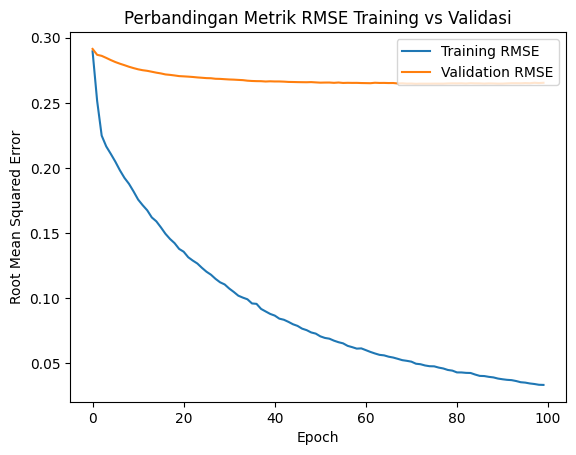

In [55]:
# Plot metrik Root Mean Squared Error untuk data training dan data validasi
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Perbandingan Metrik RMSE Training vs Validasi')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right') # Mengubah lokasi legenda agar tidak menutupi grafik
plt.show()

# 🧪 Evaluasi & Rekomendasi untuk User

Setelah model Collaborative Filtering dilatih, tahap selanjutnya adalah menggunakannya untuk menghasilkan rekomendasi film untuk pengguna tertentu. Kita akan memilih satu pengguna secara acak, mencari film yang belum ia tonton, memprediksi rating untuk film-film tersebut, dan kemudian merekomendasikan film dengan prediksi rating tertinggi.

## 👤 Pilih User Acak

Untuk mendemonstrasikan cara kerja rekomendasi, kita akan memilih satu pengguna secara acak dari dataset rating yang telah disampling (`df`). Ini dilakukan pada langkah berikutnya.

## 🔍 Temukan Film yang Belum Ditonton

Proses ini melibatkan beberapa langkah untuk menyiapkan data input bagi model prediksi:

1. `movie_df = movies_new`: Menggunakan `movies_new` (DataFrame berisi 10.000 film hasil sampling dengan `id`, `title`, `genre`) sebagai referensi data film.

2. `user_id = df['userId'].sample(1).iloc[0]`: Memilih satu `userId` secara acak dari DataFrame `df` (yang berisi 10.000 data rating sampel). Pengguna ini akan menjadi target untuk rekomendasi.

3. `movies_watch_by_user = df[df['userId'] == user_id]`: Mengambil semua data rating (film yang sudah ditonton dan dirating) yang diberikan oleh `user_id` terpilih dari dalam DataFrame `df`.

4. `movies_not_watch = movie_df[~movie_df['id'].isin(movies_watch_by_user.movieId.values)]['id']`: Mengambil daftar ID film dari `movie_df` (kumpulan 10.000 film) yang tidak ada dalam daftar film yang sudah ditonton oleh `user_id` tersebut.

5. `movies_not_watch = list(set(movies_not_watch).intersection(set(movie_to_movie_encoded.keys())))`: Langkah krusial. Ini memastikan bahwa daftar `movies_not_watch` hanya berisi film-film yang juga ada dalam `movie_to_movie_encoded`. Artinya, kita hanya akan membuat prediksi untuk film-film yang dikenal oleh model collaborative filtering (yaitu, film yang memiliki embedding karena ada dalam 10.000 data rating yang digunakan untuk training).

6. `movies_not_watch = [[movie_to_movie_encoded.get(x)] for x in movies_not_watch]`: Mengubah ID film yang belum ditonton menjadi format list dari list ID film yang sudah di-encode. Setiap sub-list berisi satu ID film yang di-encode. Ini adalah format yang dibutuhkan untuk input prediksi jika kita membuat array input secara manual.

7. `user_encoder = user_to_user_encoded.get(user_id)`: Mengambil ID pengguna yang sudah di-encode untuk `user_id` yang dipilih.

8. `user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watch), movies_not_watch))`: Membuat array NumPy `user_movie_array`. Setiap baris array ini akan berisi pasangan `[user_encoded_id, movie_encoded_id]`. Array ini akan menjadi input untuk model guna memprediksi rating film-film yang belum ditonton oleh pengguna tersebut. `[[user_encoder]] * len(movies_not_watch)` membuat array 2D di mana setiap baris adalah `[user_encoder]`, yang kemudian digabungkan secara horizontal dengan `movies_not_watch`.

**Insight**: Langkah-langkah ini memastikan bahwa kita hanya mencoba memprediksi rating untuk film yang valid (ada di metadata film kita dan dikenal oleh model) dan belum ditonton oleh pengguna. Format `user_movie_array` sesuai dengan yang diharapkan oleh metode `call` pada model kita (array dengan dua kolom: user ID encoded, movie ID encoded).

In [56]:
# Gunakan df yang sudah disampling 10.000 data rating, dan movies_new sebagai referensi film
movie_df = movies_new # movies_new berisi metadata 10k film sampel (id, title, genre)

# Ambil 1 user secara acak dari df (10rb data rating)
user_id = df['userId'].sample(1).iloc[0]
print(f"User ID yang dipilih secara acak: {user_id}")

# Film-film yang sudah ditonton/dirating oleh user ini (berdasarkan df 10rb data rating)
movies_watch_by_user = df[df['userId'] == user_id]

# movieId dari movie_df (10k film) yang BELUM ditonton/dirating oleh user
# (yang tidak ada dalam movies_watch_by_user.movieId)
movies_not_watch_ids = movie_df[~movie_df['id'].isin(movies_watch_by_user.movieId.values)]['id']

# Ambil hanya film yang belum ditonton DAN ada dalam movie_to_movie_encoded (dikenal oleh model CF)
movies_not_watch_ids_for_model = list(
    set(movies_not_watch_ids)
    .intersection(set(movie_to_movie_encoded.keys()))
)
print(f"Jumlah film yang belum ditonton user dan dikenal model: {len(movies_not_watch_ids_for_model)}")


# Ubah ke format list of list [ [encoded_movie_id], ... ]
# Ini adalah daftar movieId (encoded) yang akan diprediksi ratingnya untuk user_id
movies_not_watch_encoded = [[movie_to_movie_encoded.get(x)] for x in movies_not_watch_ids_for_model]

# Encode user ID yang dipilih
user_encoder = user_to_user_encoded.get(user_id)

# Bentuk array input untuk model: [ [user_id_encoded, movie_id_encoded_1], [user_id_encoded, movie_id_encoded_2], ... ]
# np.full membuat array dengan nilai user_encoder sebanyak jumlah film yang belum ditonton
user_array_for_pred = np.full((len(movies_not_watch_encoded), 1), user_encoder)

# Menggabungkan array user_id dengan array movie_id yang belum ditonton
if movies_not_watch_encoded: # Pastikan list tidak kosong
    user_movie_array = np.hstack((user_array_for_pred, movies_not_watch_encoded))
else:
    user_movie_array = np.array([]) # Array kosong jika tidak ada film untuk diprediksi

print(f"Bentuk user_movie_array untuk prediksi: {user_movie_array.shape}")

User ID yang dipilih secara acak: 74429
Jumlah film yang belum ditonton user dan dikenal model: 622
Bentuk user_movie_array untuk prediksi: (622, 2)


## 🔮 Prediksi Rating untuk Film Baru

Dengan menggunakan model yang telah dilatih (`model`), kita akan memprediksi skor rating yang mungkin diberikan oleh `user_id` terpilih untuk setiap film dalam `user_movie_array`. Ini dilakukan pada langkah berikutnya saat menampilkan hasil.

## 🎉 Tampilkan Hasil Rekomendasi

Tahap ini adalah puncak dari proses collaborative filtering: menampilkan rekomendasi.

1. `predicted_ratings = model.predict(user_movie_array).flatten()`: Model `model` digunakan untuk memprediksi skor rating untuk semua pasangan `(user_id_encoded, movie_id_encoded)` dalam `user_movie_array`. `flatten()` mengubah array hasil prediksi (yang mungkin berbentuk `(N, 1)`) menjadi array 1D. Skor ini adalah nilai antara 0 dan 1 (karena output sigmoid dan normalisasi target).

2. `top_ratings_indices = predicted_ratings.argsort()[-10:][::-1]`: Mengambil indeks dari 10 film dengan skor prediksi tertinggi. `argsort()` mengurutkan indeks berdasarkan nilai prediksi (dari terkecil ke terbesar), `[-10:]` mengambil 10 indeks terakhir (yang memiliki skor tertinggi), dan [::-1] membalik urutannya sehingga indeks pertama adalah untuk skor tertinggi.

3. `recommended_movie_ids_encoded = [movies_not_watch_encoded[x][0] for x in top_ratings_indices]`: Mengambil ID film yang di-encode dari daftar `movies_not_watch_encoded` berdasarkan `top_ratings_indices`.

4. `recommended_movie_ids_original = [movie_encoded_to_movie.get(encoded_id) for encoded_id in recommended_movie_ids_encoded]`: Mengubah kembali ID film yang di-encode dari film-film yang direkomendasikan menjadi ID film asli menggunakan mapping `movie_encoded_to_movie`. Selanjutnya, kita menampilkan hasil rekomendasi:

  - Informasi `user_id` yang sedang dievaluasi.

  - Daftar film yang telah ditonton dan diberi rating tinggi oleh pengguna tersebut (`top_movies_user`). Ini diambil dari `movies_watch_by_user`, diurutkan berdasarkan `rating` secara menurun, dan diambil 5 teratas. Judul dan genre dari film-film ini (diambil dari `movie_df`) ditampilkan untuk memberikan konteks mengenai selera pengguna.

  - Daftar 10 film teratas yang direkomendasikan. Detail film (judul dan genre) dari rekomendasi ini diambil dari `movie_df` berdasarkan `recommended_movie_ids_original` dan ditampilkan.

**Insight**: Output ini memungkinkan kita untuk secara kualitatif menilai apakah rekomendasi yang diberikan oleh model Collaborative Filtering masuk akal. Dengan membandingkan film yang direkomendasikan dengan film yang sudah disukai pengguna (rating tinggi), kita bisa melihat apakah ada kesamaan genre, tema, atau aktor yang mungkin menunjukkan bahwa model berhasil menangkap preferensi pengguna. Jika pengguna sering menonton film action dan direkomendasikan film action lainnya, itu pertanda baik.

In [57]:
# Pastikan user_movie_array tidak kosong sebelum melakukan prediksi
if user_movie_array.size > 0:
    # Prediksi rating user terhadap film-film yang belum ditonton
    predicted_ratings = model.predict(user_movie_array).flatten()

    # Ambil 10 indeks dengan prediksi rating tertinggi
    # argsort() mengurutkan dari kecil ke besar, jadi kita ambil 10 terakhir lalu balik urutannya
    top_ratings_indices = predicted_ratings.argsort()[-10:][::-1]

    # Ambil movieId (encoded) yang direkomendasikan berdasarkan indeks di atas
    # movies_not_watch_encoded adalah list of list, jadi kita ambil elemen pertama [0]
    recommended_movie_ids_encoded = [movies_not_watch_encoded[x][0] for x in top_ratings_indices]

    # Ubah movieId (encoded) kembali ke movieId asli
    recommended_movie_ids_original = [
        movie_encoded_to_movie.get(encoded_id) for encoded_id in recommended_movie_ids_encoded
    ]

    # Tampilkan hasil rekomendasi
    print('Showing recommendations for user:', user_id)
    print('===' * 9)
    print('Movies with high ratings from user (from 10k sampled ratings)')
    print('----' * 8)

    # Ambil film dengan rating tertinggi dari user (dari 10rb data rating)
    top_movies_user_ids = (
        movies_watch_by_user.sort_values(
            by='rating',
            ascending=False
        )
        .head(5)
        .movieId.values # Ambil movieId asli
    )

    # Tampilkan informasi film favorit user dari movie_df (metadata 10k film)
    movie_df_rows = movie_df[movie_df['id'].isin(top_movies_user_ids)]
    for row in movie_df_rows.itertuples():
        print(f"{row.title} - {row.genre}")

    print('----' * 8)
    print('Top 10 Movie Recommendations')
    print('----' * 8)

    # Ambil detail film dari rekomendasi (berdasarkan movieId asli)
    recommended_movies_details = movie_df[movie_df['id'].isin(recommended_movie_ids_original)]
    # Urutkan berdasarkan daftar rekomendasi asli agar tidak acak
    # Membuat dictionary untuk mapping id ke urutan asli
    order_map = {movie_id: i for i, movie_id in enumerate(recommended_movie_ids_original)}
    recommended_movies_details['order'] = recommended_movies_details['id'].map(order_map)
    recommended_movies_details = recommended_movies_details.sort_values('order')


    for row in recommended_movies_details.itertuples():
        print(f"{row.title} - {row.genre}")
else:
    print(f"Tidak ada film baru untuk direkomendasikan kepada user {user_id} dari daftar film yang dikenal model.")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Showing recommendations for user: 74429
Movies with high ratings from user (from 10k sampled ratings)
--------------------------------
Apt Pupil (1998) - Drama|Thriller
Mirror Mirror (2012) - Adventure|Comedy|Fantasy
His Girl Friday (1940) - Comedy|Romance
Dream With the Fishes (1997) - Drama
--------------------------------
Top 10 Movie Recommendations
--------------------------------
Wallace & Gromit: A Close Shave (1995) - Animation|Children|Comedy
Jurassic World: Fallen Kingdom (2018) - Action|Adventure|Drama|Sci-Fi|Thriller
Somewhere in Time (1980) - Drama|Romance
Beginners (2010) - Drama
Dial M for Murder (1954) - Crime|Mystery|Thriller
Third Man, The (1949) - Film-Noir|Mystery|Thriller
Born Yesterday (1950) - Comedy
Barry Lyndon (1975) - Drama|Romance|War
Ulee's Gold (1997) - Drama
M (1931) - Crime|Film-Noir|Thriller


<ipython-input-57-e88fb712abea>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies_details['order'] = recommended_movies_details['id'].map(order_map)
